In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_pickle('../wiki_data.pkl')

df.sample()

In [4]:
X = df['content']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
tfidf_vectorizer = TfidfVectorizer(min_df = 2, stop_words = 'english', ngram_range=(1,2))
document_term_matrix_sps = tfidf_vectorizer.fit_transform(X)
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=X.index,
                                       columns=tfidf_vectorizer.get_feature_names())

document_term_matrix_df.shape

In [8]:
from sklearn.decomposition import TruncatedSVD

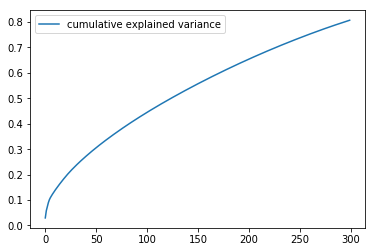

In [9]:
n_components = 300
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]
svd_matrix = SVD.fit_transform(document_term_matrix_df)
sum(SVD.explained_variance_ratio_)

plt.plot(range(n_components), np.cumsum(SVD.explained_variance_ratio_), label='cumulative explained variance')
plt.legend()

In [10]:
svd_matrix.shape

(497, 300)

In [13]:
!pip install psycopg2 --quiet
!pip install wikipedia --quiet

In [1]:
import os
import sys

# Add path where helper functions are located
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import custom helper functions
from lib import helpers

import psycopg2 as pg2
from pandas import DataFrame
from psycopg2.extras import RealDictCursor
import pandas as pd
import re
import requests
import wikipedia

from bs4 import BeautifulSoup


In [18]:
# Grab a test article to quantify similarity
helpers.get_clean_text('hello')

' hiya redirects here for other uses see hiya disambiguation hello redirects here for the british magazine see hello magazine for other uses see hello disambiguation hello is a salutation or greeting in the english language it is first attested in writing from NUMBER NUMBER contents NUMBER early uses NUMBER etymology NUMBER NUMBER telephone NUMBER NUMBER hullo NUMBER NUMBER hallo and hollo NUMBER hello world computer program NUMBER apple dos hello program NUMBER see also NUMBER references NUMBER external links early uses edit hello with that spelling was used in publications in the us as early as the NUMBER october NUMBER edition of the norwich courier of norwich connecticut NUMBER another early use was an NUMBER american book called the sketches and eccentricities of col david crockett of west tennessee NUMBER which was reprinted that same year in the london literary gazette NUMBER the word was extensively used in literature by the NUMBER s NUMBER etymology edit according to the oxfor

Get the top five related articles to "Hello" article

In [20]:
# Take the cosine similarity between the test_vector and the svd_matrix

test_vector = get_clean_text('Adversarial machine learning')

test_vector = pd.Series(test_vector)
test_document_term_matrix_sps = tfidf_vectorizer.transform(test_vector)
test_document_term_matrix_df = pd.DataFrame(test_document_term_matrix_sps.toarray(),
                                       index=test_vector.index,
                                       columns=tfidf_vectorizer.get_feature_names())
test_svd_matrix = SVD.transform(test_document_term_matrix_df)

In [234]:
def cosine_sim(one, two):
    mag_1 = np.zeros(one.shape[0])
    cos = []
    mag_2 = np.sqrt(np.dot(two,two.T))
    for i in range(one.shape[0]):
        mag_1 = np.sqrt(np.dot(one[i,:], one[i,:])) # scalar
        cos.append(np.dot(one[i,:],two.reshape(-1,1)) / (mag_1 * mag_2))
    return cos

In [240]:
cos = cosine_sim(svd_matrix, test_svd_matrix)
cos=np.array([float(i[0]) for i in cos])
x = cos
y = cos

index = np.argsort(x)
sorted_x = x[index]
sorted_index = np.searchsorted(sorted_x, y)

index = sorted_index == 496
top_5 = []
for i in range(0,5):
    index = sorted_index == (496-i)
    top_5.append(np.where(index)[0][0])
print('Top Five Related Articles:')
for i,article in enumerate(df['title'][top_5].values):
    print(str(i+1)+': {}'.format(article))

Top Five Related Articles:
1: adversarial machine learning
2: machine learning
3: timeline of machine learning
4: list of datasets for machine learning research
5: bluespice mediawiki
